Run PTA with n = 1000 samples.

The number of epochs needed for the convergence increases with the increase in the number of the samples. The graph Epoch number vs Number of misclassifications for learning rate is almost same for both.

In [151]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


In [152]:
w0 = np.random.uniform(-0.25, 0.25)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
w_initial = [w0, w1, w2]
print("Omega used for optimal output", w_initial)

Omega used for optimal output [0.1938169185644385, 0.6866949217566258, -0.5877405303364773]


In [153]:
S = np.random.uniform(low = -1, high = 1, size = [1000, 2])
print(S)

[[-0.65012496 -0.89296712]
 [-0.98231578  0.0883886 ]
 [ 0.30388308 -0.05659703]
 ...
 [-0.32696528  0.42022974]
 [-0.26715722  0.82521099]
 [ 0.06299717  0.6313313 ]]


In [154]:
S1 = []
S0 = []
for vec in S:
    if(w0 + vec[0]*w1 + vec[1]*w2 >= 0):
        S1.append(vec)
    else:
        S0.append(vec)


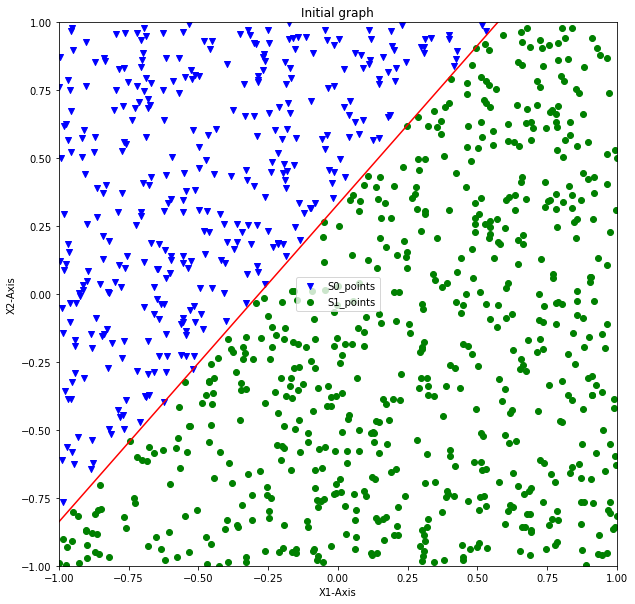

In [155]:
x = np.array([-1,1])
y = (-w0 - w1*x)/ w2
plt.figure(figsize=(10,10))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.plot(x, y, c = 'r')
plt.xlabel('X1-Axis')
plt.ylabel('X2-Axis')
plt.title('Initial graph')
S0_x = [vec[0] for vec in S0]
S0_y = [vec[1] for vec in S0]
S1_x = [vec[0] for vec in S1]
S1_y = [vec[1] for vec in S1]
plt.scatter(S0_x, S0_y, c='blue', marker='v', label='S0_points') 
plt.scatter(S1_x, S1_y, c='green', marker='o', label='S1_points')
plt.legend()

In [156]:
learning_rate = 1
w0_ = np.random.uniform(-1,1)
w1_ = np.random.uniform(-1,1)
w2_ = np.random.uniform(-1,1)
weights = [w0_, w1_, w2_]
S0 = np.asarray(S0)
S1 = np.asarray(S1)

In [157]:
weights

[-0.9946193129000409, -0.3856123914997309, -0.337627231200208]

In [158]:
def step_function(val):
    if val >= 0:
        return 1
    return 0

In [159]:
def PTA(w, eta):
    epoch_no = 0
    no_misc = 0
    epochs = []
    list_mis = []
    while True:
        misclass = 0
        epoch_no += 1
        epochs.append(epoch_no)
        for inp in S:
            out = step_function(w[0]*1 + w[1]*inp[0] + w[2]*inp[1])
            if out == 1 and inp in S0:
                misclass += 1
                no_misc += 1
                w[0] = w[0] - eta*1
                w[1] = w[1] - eta*inp[0]
                w[2] = w[2] - eta*inp[1]
            elif out == 0 and inp in S1:
                misclass += 1
                no_misc += 1
                w[0] = w[0] + eta*1
                w[1] = w[1] + eta*inp[0]
                w[2] = w[2] + eta*inp[1]
        list_mis.append(misclass)
        if misclass == 0:
            return w, epoch_no, no_misc, epochs, list_mis
                
    

In [160]:
weigh, epochs, misclass_no, epoch_list, misclass_list = PTA(weights, learning_rate)
print(w_initial, weigh, epochs, misclass_no)

[0.1938169185644385, 0.6866949217566258, -0.5877405303364773] [6.005380687099959, 21.018332001878516, -17.798439059418083] 64 921


Text(0.5,1,'Epoch number vs Number of misclassifications for learning rate = 1')

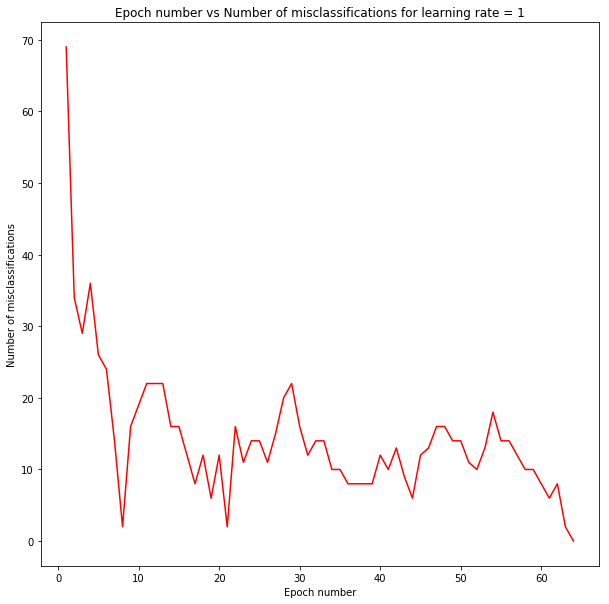

In [161]:
plt.figure(figsize=(10,10))
plt.plot(epoch_list,misclass_list, c = 'r')
plt.xlabel('Epoch number')
plt.ylabel('Number of misclassifications')
plt.title('Epoch number vs Number of misclassifications for learning rate = 1')

In [162]:

weigh10, epochs10, misclass_no10, epoch_list10, misclass_list10 = PTA([w0_,w1_,w2_], 10)
print(weigh10, epochs10, misclass_no10)

[59.00538068709996, 206.61104029348084, -175.00383638323126] 65 926


Text(0.5,1,'Epoch number vs Number of misclassifications for learning rate = 10')

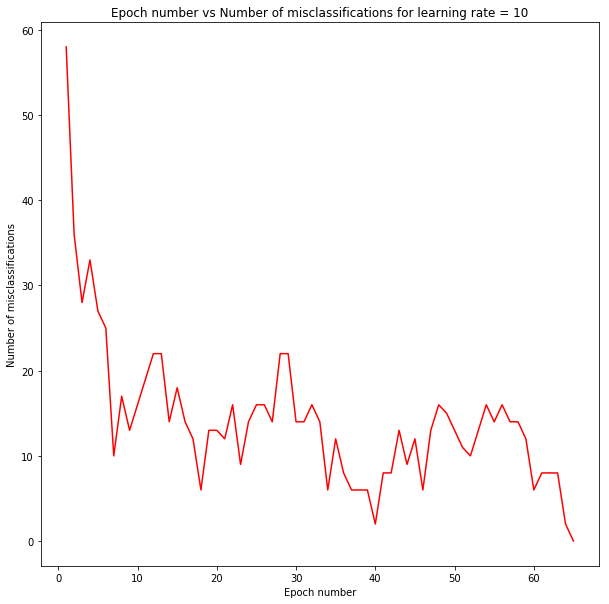

In [163]:
plt.figure(figsize=(10,10))
plt.plot(epoch_list10,misclass_list10, c = 'r')
plt.xlabel('Epoch number')
plt.ylabel('Number of misclassifications')
plt.title('Epoch number vs Number of misclassifications for learning rate = 10')

In [164]:

weigh01, epochs01, misclass_no01, epoch_list01, misclass_list01 = PTA([w0_,w1_,w2_], 0.1)
print(weigh01, epochs01, misclass_no01)

[0.7053806870999589, 2.5026976185392007, -2.1388428286737087] 98 1287


Text(0.5,1,'Epoch number vs Number of misclassifications for learning rate = 0.1')

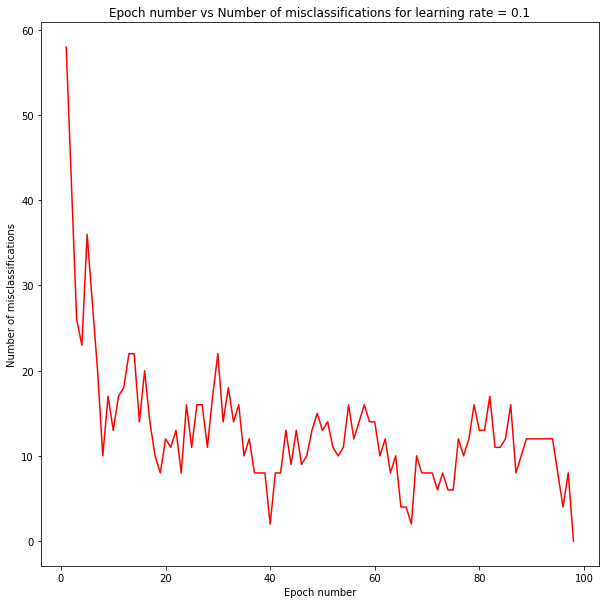

In [165]:
plt.figure(figsize=(10,10))
plt.plot(epoch_list01,misclass_list01, c = 'r')
plt.xlabel('Epoch number')
plt.ylabel('Number of misclassifications')
plt.title('Epoch number vs Number of misclassifications for learning rate = 0.1')